## Vehicles Exploratory Data Analysis

## Introduction

This project seeks to analyze vehicle sales data in-order to find any useful insights or trends in what factors may effect how long a vehicle is listed for in-order to assist sellers with how best to advertise their vehicles. 

In [179]:
import pandas as pd
import plotly.express as px
import numpy as np

In [180]:
df = pd.read_csv('vehicles_us.csv')

In [181]:
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

## Project Description

* Cleaning and enrichment of data.
* Basic analysis to determine what factors drive the price of vehicles. 
* Basic data analysis to determine what factors influence that amount of days a car is listed. 


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [184]:
#checking for duplicated rows
print(df.duplicated().sum())

print(df[['model_year','model','odometer','paint_color']].duplicated().sum())
print(df[['model','odometer']].duplicated().sum())

0
11519
23562


There are no fully duplicate rows; however, there appear to be duplicated values between 4 columns and between the model and odometer columns.
I wouldn't expect to have this many duplicates due to how much I would expect an odometer reading to vary. 
I'll leave it for now becaue I don't have enough information on this data to justify dropping this much of the dataset.

In [186]:
#checking for missing values
print(df.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [187]:
#filling missing values of model_year
print(df['model_year'].unique())
df['model_year'] = df['model_year'].fillna('Unknown')

[2011.   nan 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2009. 2010.
 2007. 2004. 2005. 2001. 2006. 1966. 1994. 2019. 2000. 2016. 1993. 1999.
 1997. 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990.
 1992. 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986.
 1980. 1964. 1963. 1984. 1982. 1973. 1970. 1955. 1971. 1976. 1983. 1954.
 1962. 1948. 1960. 1908. 1961. 1936. 1949. 1958. 1929.]


In [188]:
#checking if missing values in 'cylinders' is related to other missing values in the df
print(df[(df['cylinders'].isna()) & (df['model_year']=='Unknown')])

       price model_year                        model  condition  cylinders  \
72      3650    Unknown               subaru impreza  excellent        NaN   
159    23300    Unknown  nissan frontier crew cab sv       good        NaN   
370     4700    Unknown                     kia soul       good        NaN   
418     4998    Unknown               toyota corolla       good        NaN   
664     5000    Unknown            toyota highlander  excellent        NaN   
...      ...        ...                          ...        ...        ...   
50643  21499    Unknown                     ram 2500       good        NaN   
50836  39488    Unknown                    ford f350   like new        NaN   
50924   1999    Unknown   jeep grand cherokee laredo       good        NaN   
51125  20900    Unknown                   ford f-150  excellent        NaN   
51351  23900    Unknown   chevrolet silverado 2500hd       good        NaN   

         fuel  odometer transmission    type paint_color  is_4w

With only 363 results, it doesn't appear that missing values of 'cylinders' and 'model_year' are related. 
I believe the best course of action would be to continue replacing missing values with 'Unknown'

In [190]:
df['cylinders'] = df['cylinders'].fillna('Unknown')
df['paint_color'] = df['paint_color'].fillna('Unknown')
print(df.isna().sum())

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7892
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [191]:
#Filled missing values of the odometer column with 'unknown'
#Not having data in this column will not hinder the EDA 
df['odometer'] = df['odometer'].fillna('Unknown')
print(df['odometer'].isna().sum())

0


In [192]:
#In this case, it appears that '1' tells us that the vehicle is 4wd
#I will replace the null values with '0' to tell us that a vehicle does not have 4wd
#I'll also chage the dtype to int64
print(df['is_4wd'].unique())

[ 1. nan]


In [193]:
df['is_4wd']=df['is_4wd'].fillna(0)
print(df.isna().sum())
print(df['is_4wd'].unique())
df['is_4wd'] = df['is_4wd'].astype('int')


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64
[1. 0.]


In [194]:
print(df['date_posted'].head(1))

0    2018-06-23
Name: date_posted, dtype: object


All missing values have been dealt with.

In [196]:
#I'll also change the dtype of the date_posted column to dt format.
df['date_posted']=pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')


The dataset is now clean and the dtypes are correct. Now it's time for some EDA.

In [198]:
df.head()

price model_year           model  condition cylinders fuel  odometer  \
0   9400     2011.0          bmw x5       good       6.0  gas  145000.0   
1  25500    Unknown      ford f-150       good       6.0  gas   88705.0   
2   5500     2013.0  hyundai sonata   like new       4.0  gas  110000.0   
3   1500     2003.0      ford f-150       fair       8.0  gas   Unknown   
4  14900     2017.0    chrysler 200  excellent       4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     Unknown       1  2018-06-23           19  
1    automatic  pickup       white       1  2018-10-19           50  
2    automatic   sedan         red       0  2019-02-07           79  
3    automatic  pickup     Unknown       0  2019-03-22            9  
4    automatic   sedan       black       0  2019-04-02           28

In [199]:
#this function groups the amount of days car is listed ['days_listed'] into a turnover_rate column where 0-75 days is considered a short turnover rate
#between 75 and 150 is considered medium and anything over 150 is considered a long turnover rate.
#it may be helpful to see factors contribute to how long a car is listed for
df['days_listed'].sort_values().unique()
turn_over=[]
def turnover(days):
   
    
    for item in days:
        if item <= 75:
            item = 'short'
            turn_over.append(item)
        elif item > 75 and item <= 150:
            item = 'medium'
            turn_over.append(item)
        elif item > 150:
            item = 'Long'
            turn_over.append(item)
          

turnover(df['days_listed'])
df['turnover_rate'] = turn_over


In [200]:
#Replaced values in the 'is_4wd' column with more descriptive values, 2wd (2 wheel drive) and 4wd (4 wheel drive)
#Changed the name of the column 'is_4wd' to 'Drivetrain'

df['is_4wd'] = df['is_4wd'].replace(0, '2wd')
df['is_4wd'] = df['is_4wd'].replace(1, '4wd')
df = df.rename(columns = {'is_4wd':'Drivetrain'})
df.head()

price model_year           model  condition cylinders fuel  odometer  \
0   9400     2011.0          bmw x5       good       6.0  gas  145000.0   
1  25500    Unknown      ford f-150       good       6.0  gas   88705.0   
2   5500     2013.0  hyundai sonata   like new       4.0  gas  110000.0   
3   1500     2003.0      ford f-150       fair       8.0  gas   Unknown   
4  14900     2017.0    chrysler 200  excellent       4.0  gas   80903.0   

  transmission    type paint_color Drivetrain date_posted  days_listed  \
0    automatic     SUV     Unknown        4wd  2018-06-23           19   
1    automatic  pickup       white        4wd  2018-10-19           50   
2    automatic   sedan         red        2wd  2019-02-07           79   
3    automatic  pickup     Unknown        2wd  2019-03-22            9   
4    automatic   sedan       black        2wd  2019-04-02           28   

  turnover_rate  
0         short  
1         short  
2        medium  
3         short  
4         short

In [201]:
fig = px.box(df, x='Drivetrain', y='price', color='Drivetrain', title = 'How Drivetrain Effects Price', width = 800, height = 800)
fig.update_layout(xaxis_title='Drivetrain', yaxis_title='Price')
fig.show()

This boxplot shows that the price of vehicles that are 4wd is higher on average than those that are not 4wd.

In [203]:
df1 = df.groupby(['condition','model'])['condition'].value_counts().reset_index()
df1.head()

condition              model  count
0  excellent           acura tl    105
1  excellent             bmw x5    160
2  excellent      buick enclave    155
3  excellent  cadillac escalade    166
4  excellent   chevrolet camaro    232

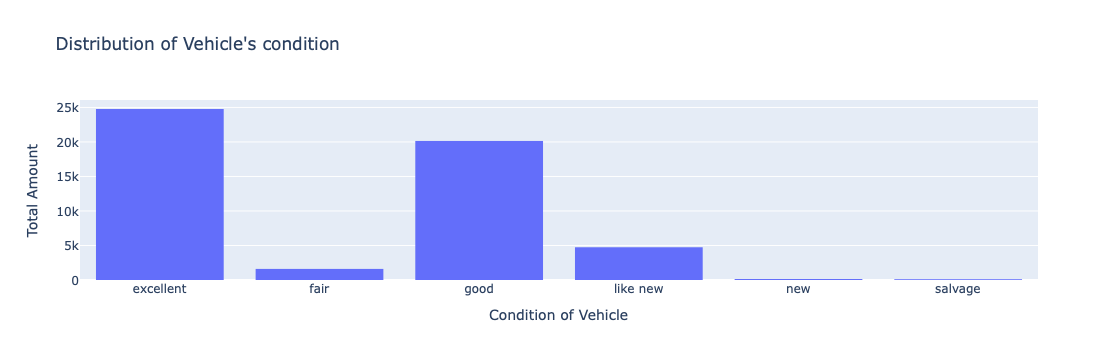

In [204]:
fig2 = px.histogram(df1, x = 'condition', y='count', title = 'Distribution of Vehicle\'s condition')
fig2.update_layout(xaxis_title = 'Condition of Vehicle', yaxis_title='Total Amount')
fig2.show()

This chart shows the distribution of the condition of cars present in the dataframe, the majority of vehicles are in excellent or good condition. 

In [206]:
group = df.groupby('cylinders')['price'].mean().reset_index()
group.head()
print(df['cylinders'].value_counts())

cylinders
8.0        15844
6.0        15700
4.0        13864
Unknown     5260
10.0         549
5.0          272
3.0           34
12.0           2
Name: count, dtype: int64


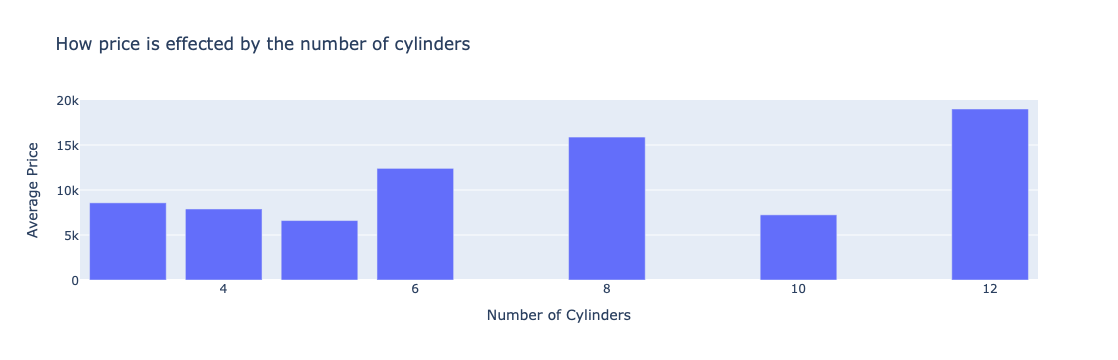

In [207]:
fig3 = px.bar(group, x = 'cylinders', y='price', title = 'How price is effected by the number of cylinders')
fig3.update_layout(xaxis_title = 'Number of Cylinders', yaxis_title = 'Average Price')
fig3.show()

With most of the vehicles in the data set being either 4, 6, or 8 cylinders, we can reliably say that for the majority of vehicles, as the cylinders in the vehicle increase, so does the price. 

Both 12 and 3 cylinder vehicles can be considered outliers as there are so few samples. 5 and 10 cylinder vehicles are certainly less common and don't follow the trend described above. My assumption is that these models aren't in demand like the 4, 6, and 8 cylinder vehicles and the price reflects this. 

In [209]:
group2 = df.groupby(['turnover_rate','days_listed'])['price'].mean().reset_index()
group2.head()

turnover_rate  days_listed         price
0          Long          151   9759.090909
1          Long          152  22329.166667
2          Long          153  10566.750000
3          Long          154  10019.600000
4          Long          155  24635.500000

In [210]:
fig4 = px.scatter(group2, x='days_listed', y='price', color='turnover_rate', title = 'Price vs duration a vehicle is listed for')
fig4.update_layout(xaxis_title = 'Days Listed', yaxis_title = 'Average Price')
fig4.show()

There is clearly a 'right price' for a vehicle, the more a car deviates from the $12,000 range, the more likely it is to stay listed for longer, even if the price drops significantly. 

In [212]:
df_turnover = df.groupby('turnover_rate')['price']
fig5 = px.scatter(df, x = 'days_listed', y='condition', color='turnover_rate', title = 'Condition vs duration a vehicle is listed for')
fig5.update_layout(xaxis_title = 'Days Listed', yaxis_title = 'Condition of Vehicle')
fig5.show()

Most of the vehicles that have been listed for more than 150 days are in excellent, fair, good, or likenew condition. Both new and salvage vehicles don't typically remain listed for more than 100 days. 

## Conclusion

* As the number of cylinders increases, so does the price. This trend is especially true for the most popular vehicles, 4, 6, and 8 cylinder.
* Cars sold quickest are often those that are in new, fair or salvage conidition.
* Vehicles whose conditions are like new, excellent, and good, tend to stay listed longer
* There certainly seems to be a price range that sells the most, that is between 10k and around 14k. The more the price deviates from this range (decreasing or increasing), the longer it will stay on the market.  
